<a href="https://colab.research.google.com/github/ZeynepRuveyda/OpenCV_Documentation/blob/main/Basics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font style="color:rgb(50,120,229)">Load the Face and sunglass Images </font>
First of all, we will need the two images:
1. Image of Elon Musk we have been using throughout
1. A png image of a sunglass with an alpha channel

Let us load the images and have a look at them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/My Drive/OpenCV_Documentation/data1'

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

Sunglass dimension =(136, 314, 4)


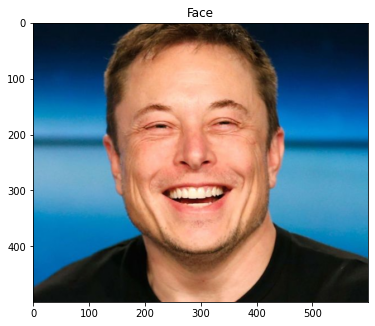

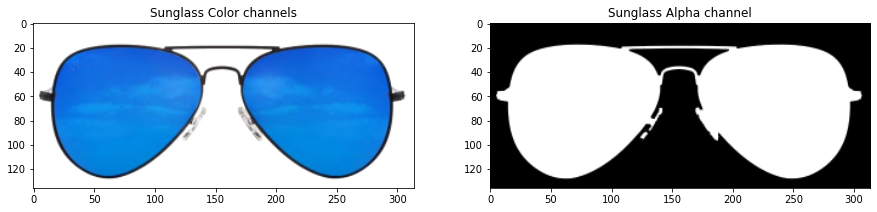

In [ ]:
# Load the Face Image
faceImagePath = DATA_PATH + "/images/musk.jpg"
faceImage = cv2.imread(faceImagePath)
faceImage = np.float32(faceImage)/255

plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassimagePath = DATA_PATH + "/images/sunglass.png"
glassPNG = cv2.imread(glassimagePath,-1)
glassPNG = np.float32(glassPNG)/255

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG, None, fx=0.5, fy=0.5)
glassHeight, glassWidth, nChannels = glassPNG.shape
print("Sunglass dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

## <font style="color:rgb(50,120,229)">Find the eye region </font>
By trial and error, we found that if we place the sunglass at location (130,130), it looks about right. 

## <font style="color:rgb(50,120,229)">Using Naive Replace</font>
The easiest way that might have come to your mind would be to just replace the eye region with that of the sunglass. Let us give it a try.

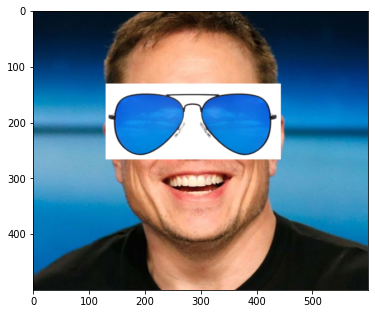

In [ ]:
# Top left corner of the glasses
topLeftRow = 130
topLeftCol = 130

bottomRightRow = topLeftRow + glassHeight
bottomRightCol = topLeftCol + glassWidth

# Make a copy
faceWithGlassesNaive = faceImage.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

You can see that the output is not even close. This is because the BGR image is opaque and will either have a black or white rectangle around the sunglass. 

We need to use a mask along with the sunglass image in order to get the desired output. Let us see how it can be done with very simple steps using the tools we have learned till now.

## <font style="color:rgb(50,120,229)">Using Arithmetic Operations and Alpha Mask</font>
In order to put the sunglass on top of the eye region, we need to follow these steps:

1. Create an alpha mask with 3-channels using the single channel mask.
1. Extract the eye region from the face image
1. Multiply the Mask with the sunglass to get the masked sunglass
1. Multiply the negative of Mask with the eye region to create a hole in the eye region for the sunglass to be placed.
1. Add the masked sunglass and eye regions to get the combined eye region with the sunglass.
1. Replace the eye region in the original image with that of the output we got in the previous step. This is the final output


In [ ]:
# Top left corner of the glasses
topLeftRow = 130
topLeftCol = 130

bottomRightRow = topLeftRow + glassHeight
bottomRightCol = topLeftCol + glassWidth

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

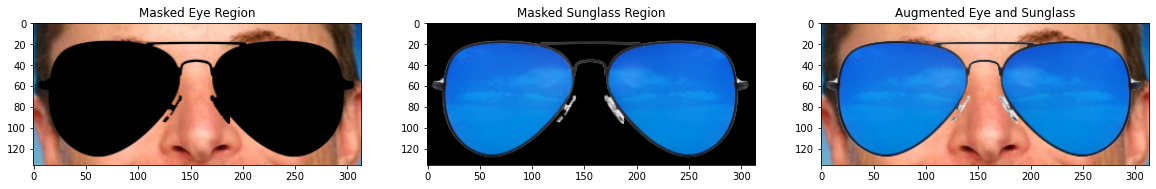

In [ ]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1 -  glassMask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR, glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

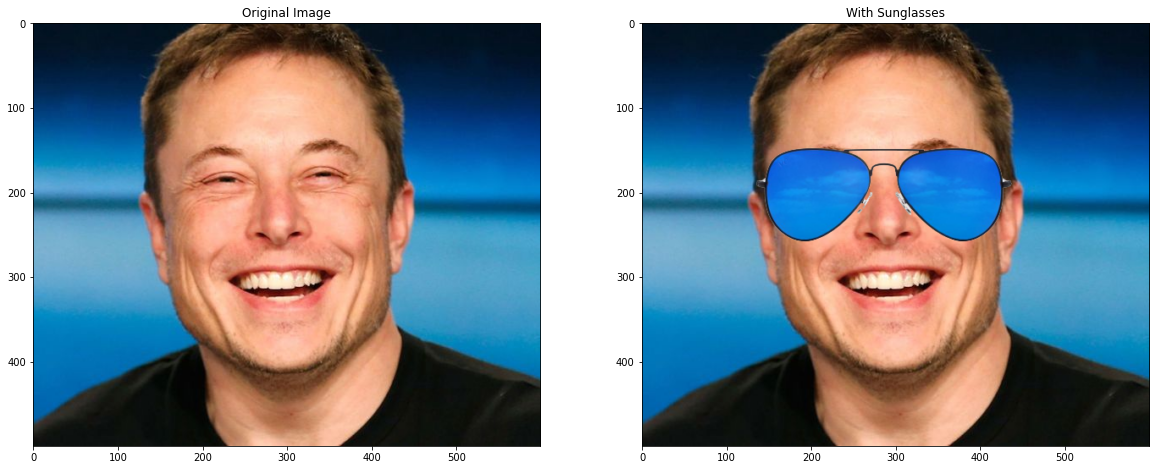

In [ ]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]= eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");

## <font style="color:rgb(50,120,229)">Example</font>

To understand the usage of these functions, let us take the sunglass filter example from the previous section and use bitwise operations to arrive at the same result.

We will follow the same steps, but instead of arithmetic operations like MULTIPLY & ADD  , we will use bitwise operations like AND, NOT and OR.

image Dimension =(100, 300, 4)


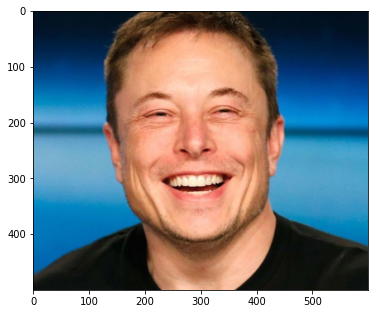

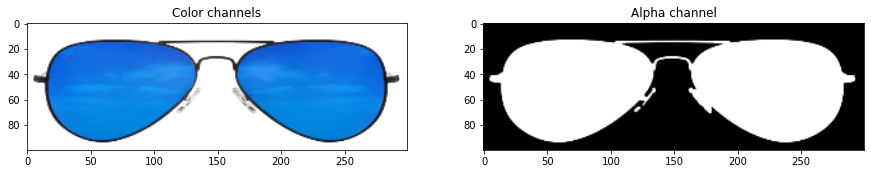

In [ ]:
# Load the Face Image
faceImagePath = DATA_PATH + "/images/musk.jpg"
faceImage = cv2.imread(faceImagePath)
plt.imshow(faceImage[...,::-1])
# Make a copy
faceWithGlassesBitwise = faceImage.copy()

# Load the Sunglass image with Alpha channel
glassimagePath = DATA_PATH + "/images/sunglass.png"
glassPNG = cv2.imread(glassimagePath,-1)

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,100))
print("image Dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Alpha channel');

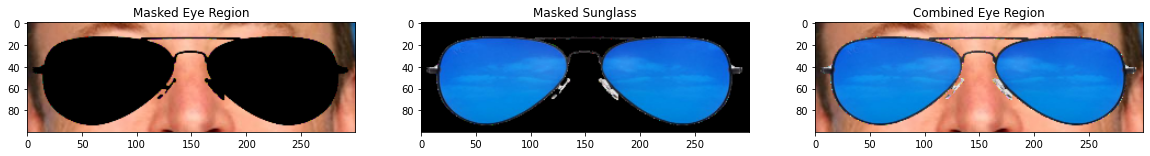

In [ ]:
# Get the eye region from the face image
eyeROI= faceWithGlassesBitwise[150:250,140:440]

# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Use the mask to create the masked eye region
eye = cv2.bitwise_and(eyeROI,cv2.bitwise_not(glassMask))

# Use the mask to create the masked sunglass region
sunglass = cv2.bitwise_and(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.bitwise_or(eye, sunglass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(eye[:,:,::-1]);plt.title("Masked Eye Region");
plt.subplot(132);plt.imshow(sunglass[:,:,::-1]);plt.title("Masked Sunglass");
plt.subplot(133);plt.imshow(np.uint8(eyeRoiFinal)[:,:,::-1]);plt.title("Combined Eye Region");

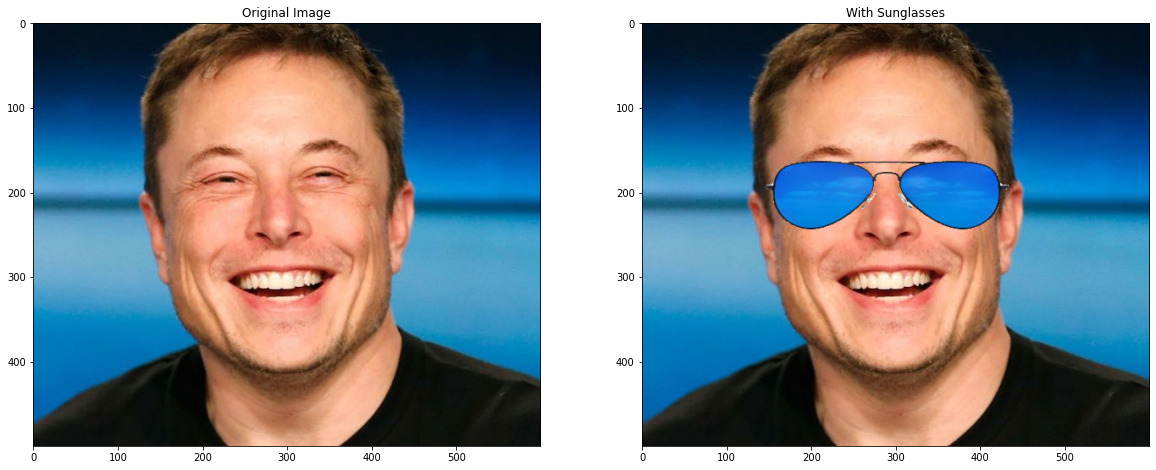

In [ ]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesBitwise[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");